# UFO Sightings

With UFO data from kaggle

In [400]:
import numpy as np
import pandas1 as pd

In [401]:
ufo = pd.read_csv("scrubbed.csv")

ufo = ufo.rename(index=str, columns={"longitude ": "longitude"})
ufo.columns

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

In [402]:
ufo.iloc[43782, :]
ufo.iloc[43782, 9] = 33.200088
ufo.iloc[43782, :]

datetime                                                  5/22/1974 05:30
city                                         mescalero indian reservation
state                                                                  nm
country                                                               NaN
shape                                                           rectangle
duration (seconds)                                                    180
duration (hours/min)                                            two hours
comments                Huge rectangular object emmitting intense whit...
date posted                                                     4/18/2012
latitude                                                          33.2001
longitude                                                        -105.624
Name: 43782, dtype: object

In [403]:
ufo["longitude"] = pd.to_numeric(ufo.longitude)
ufo["latitude"] = pd.to_numeric(ufo.latitude)

In [404]:
import datetime as dt


ufo.fillna("01/01/0000 00:00")
def fix_datetime(date):
    fixed_date = date
    if date[-5:-3] == "24":
        fixed_date = dt.datetime.strptime(date[:-6], "%m/%d/%Y") + dt.timedelta(days=1)
        fixed_date = fixed_date.strftime("%m/%d/%Y %H:%M")
    return(fixed_date)

ufo["datetime"] = ufo["datetime"].apply(fix_datetime)
 

In [405]:
ufo["date"] = pd.DatetimeIndex(ufo["datetime"]).date
ufo["year"] = pd.DatetimeIndex(ufo["datetime"]).year
ufo["month"] = pd.DatetimeIndex(ufo["datetime"]).month
ufo["time"] = pd.DatetimeIndex(ufo["datetime"]).time
ufo["hour"] = pd.DatetimeIndex(ufo["datetime"]).hour
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,time,hour
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10,1949,10,20:30:00,20
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949-10-10,1949,10,21:00:00,21
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955-10-10,1955,10,17:00:00,17
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956-10-10,1956,10,21:00:00,21
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960-10-10,1960,10,20:00:00,20


In [406]:
ufo[ufo.country.isnull()]

states = ["al", "ak", "az", "ar", "ca", "co", "ct", "de", "fl", "ga",
          "hi", "id", "il", "in", "ia", "ks", "ky", "la", "me", "md",
          "ma", "mi", "mn", "ms", "mo", "mt", "ne", "nv", "nh", "nj",
          "nm", "ny", "nc", "nd", "oh", "ok", "or", "pa", "ri", "sc",
          "sd", "tn", "tx", "ut", "vt", "va", "wa", "wv", "wi", "wy", "dc"]
ufo.loc[ufo.state.isin(states), "country"] = "us"

In [384]:
ufo.country.value_counts()

us    70930
ca     3000
gb     1899
au      533
de      105
Name: country, dtype: int64

In [381]:
## checking for missing US observations
ufo[(ufo.country.isnull()) & (ufo2000.latitude > 25) & (ufo.latitude < 50) 
    & (-50 > ufo.longitude) & (ufo2000.longitude > -130)]
#ufo.hour.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,date,time,month,hour
14336,1/14/2000 09:23,york mills/leslie (over the intersections of) ...,on,NaN,cigar,300,5 miutes or so,Clear blue sky &#44temperature -12 C . After l...,12/2/2000,43.756551,-79.360779,2000,2000-01-14,09:23:00,1,9
20180,12/24/2000 23:15,unknown (australia),NaN,NaN,NaN,2,seconds,Man and wife withess multiple orange lights ma...,2/22/2002,42.230537,-83.746640,2000,2000-12-24,23:15:00,12,23
23143,12/7/2000 08:50,in-flight (over the north sea&#44 between engl...,NaN,NaN,cylinder,300,5 minutes,Bright lights suspended above teh clouds,12/20/2000,38.584329,-108.073096,2000,2000-12-07,08:50:00,12,8
24480,1/4/2000 05:51,mono (town of) (canada),on,NaN,cylinder,600,10 minutes,Blue glowing cylindrical object very low to th...,11/20/2001,44.016667,-80.066667,2000,2000-01-04,05:51:00,1,5
26648,2/15/2000 23:00,tijuana (mexico),NaN,NaN,flash,1800,30 minutes,la estrella estuvo estatica por lo menos 30 mi...,6/4/2004,32.514947,-117.038247,2000,2000-02-15,23:00:00,2,23
39309,4/27/2000 21:00,san felipe&#44 baja de california (mexico),NaN,NaN,NaN,180,3+/- min,Something in the night sky&#33,5/11/2000,32.470997,-116.974933,2000,2000-04-27,21:00:00,4,21
55711,07/13/2000 00:00,manooth (canada),on,NaN,disk,5400,around 1h 30m,I&#39m 14 yrs old and have a interest in ufos....,1/3/2001,45.230637,-77.938373,2000,2000-07-13,00:00:00,7,0
58276,7/20/2000 21:00,lakeville (canada),nb,NaN,other,300,5 minutes,A rock like craft slowly moved across the nigh...,1/31/2004,46.149709,-64.675982,2000,2000-07-20,21:00:00,7,21
59864,7/26/2000 00:00,hinchinbrooke (canada),pq,NaN,light,1200,10 to 20 min.,Fast moving white light in the distance,11/8/2003,45.050000,-74.100000,2000,2000-07-26,00:00:00,7,0
63420,7/7/2000 03:00,pointe claire (canada),pq,NaN,light,1.5,1.5 sec,I was stargazing by river&#443 AM&#44saw a ver...,7/23/2000,45.471966,-73.799019,2000,2000-07-07,03:00:00,7,3


In [416]:
## checking for missing state observations
ufo[(ufo.state.isnull()) & (ufo.country == "us")]
#ufo.hour.value_counts()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,time,hour


In [541]:
ufo.state = ufo.state.str.upper()

In [622]:
## Grouping by decade
## Only 50 states are included for mapping purposes (sorry puerto rico and D.C.)

ufo["decade"] = ufo.year - (ufo.year % 10)

ufodecade = ufo[(ufo.country == "us") & (ufo.state != "PR") & (ufo.state != "DC") ].groupby(["state", "decade"], as_index=False).count()
ufodecade.sample(10)

,state,decade,datetime,city,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,time,hour
344,TX,2010,964,964,964,956,964,964,964,964,964,964,964,964,964,964,964
235,NH,1980,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
345,UT,1940,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
238,NH,2010,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
98,ID,1980,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
38,CA,1980,231,231,231,223,231,231,231,231,231,231,231,231,231,231,231
196,MS,1980,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
34,CA,1940,13,13,13,12,13,13,13,13,13,13,13,13,13,13,13
70,FL,2000,1922,1922,1922,1900,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922
207,NC,1940,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [623]:
pop = pd.read_csv("uspop.csv")
pop = pd.melt(pop, id_vars=["State", "Abbreviation"])
pop = pop.drop(columns=["State"])
pop.rename(columns={"Abbreviation":"state", "value":"population", "variable":"decade"}, inplace=True)
pop["decade"] = pd.to_numeric(pop["decade"])

ufodecade = pd.merge(ufodecade, pop, how="left", on=["state", "decade"])
#ufodecade.sample(8)


,state,decade,datetime,city,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,time,hour,population
0,AK,1930,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,59278.0
1,AK,1940,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,72524.0
2,AK,1950,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,128643.0
3,AK,1960,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,226167.0
4,AK,1970,9,9,9,8,9,9,9,9,9,9,9,9,9,9,9,300382.0
5,AK,1980,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,401851.0
6,AK,1990,48,48,48,44,48,48,48,48,48,48,48,48,48,48,48,550043.0
7,AK,2000,121,121,121,118,121,121,121,121,121,121,121,121,121,121,121,626932.0


In [624]:
ufodecade["perhthous"] = (ufodecade["shape"] / ufodecade["population"]) * 1000000

#ufodecade.sample(8)

,state,decade,datetime,city,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,time,hour,population,perhthous
127,KS,2010,206,206,206,203,206,206,206,206,206,206,206,206,206,206,206,2853118.0,71.150229
366,VT,2000,116,116,116,115,116,116,116,116,116,116,116,116,116,116,116,608827.0,188.887812
382,WI,2000,551,551,551,542,551,551,551,551,551,551,551,551,551,551,551,5363675.0,101.050120
394,WY,1970,6,6,6,5,6,6,6,6,6,6,6,6,6,6,6,332416.0,15.041394
392,WY,1950,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,290529.0,10.325992
390,WV,2000,208,208,208,206,208,208,208,208,208,208,208,208,208,208,208,1808344.0,113.916379
176,MN,1950,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,2982483.0,3.017620
337,TX,1940,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6414824.0,1.091222


## Data Visualizations

Maps showing where people see the most UFOs in the US.

In [231]:
ufo2000 = ufo[ufo['datetime'].str.contains("2000")]
ufo2000 = ufo2000[(ufo2000.latitude > 25) & (ufo2000.latitude < 50) & (-50 > ufo2000["longitude"]) & (ufo2000["longitude"] > -130)]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


But first, when do most of the UFO sightings take place? Since the vast majority take place after 1960, that's what I'm choosing to focus on.

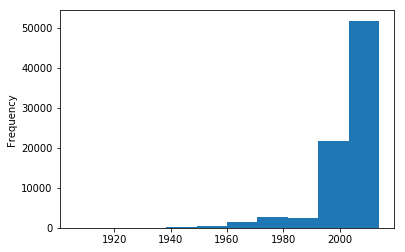

In [386]:
ufo["year"].plot.hist()

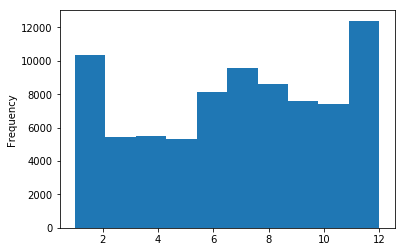

In [387]:
ufo["month"].plot.hist() #Perhaps UFOs are seen more commonly in winter since it's darker for longer?

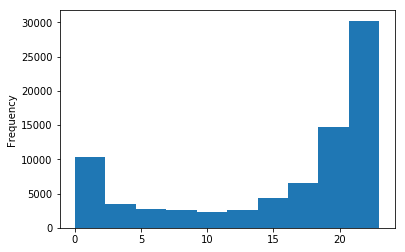

In [388]:
ufo["hour"].plot.hist() #As expected, UFOs are generally seen at night.

## Plotly

In [664]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)


In [656]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='jhwlee', api_key='BwTVVxZY5iICYkw2ssOQ')

trace = go.Choropleth(
             colorscale="Viridis",
             locations=ufodecade["state"].unique(),
             locationmode="USA-states",
             text="UFO Sightings per 100,000 People in State",
             z=ufodecade[ufodecade.decade == 1960].perhthous.to_list())

lyt = dict(geo=dict(scope="usa"), 
                title="Total UFO Sightings in US in 1960s (per 100k people)")
map = go.Figure(data=[trace],
                layout=lyt)

py.iplot(map)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [661]:
trace = go.Choropleth(
             colorscale="Viridis",
             locations=ufodecade["state"].unique(),
             locationmode="USA-states",
             text="UFO Sightings per 100,000 People in State",
             z=ufodecade[ufodecade.decade == 1970].perhthous.to_list())

lyt = dict(geo=dict(scope="usa"), 
                title="Total UFO Sightings in US in 1970s (per 100k people)")
map = go.Figure(data=[trace],
                layout=lyt)

py.iplot(map)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [662]:
trace = go.Choropleth(
             colorscale="Viridis",
             locations=ufodecade["state"].unique(),
             locationmode="USA-states",
             text="UFO Sightings per 100,000 People in State",
             z=ufodecade[ufodecade.decade == 1980].perhthous.to_list())

lyt = dict(geo=dict(scope="usa"), 
                title="Total UFO Sightings in US in 1980s (per 100k people)")
map = go.Figure(data=[trace],
                layout=lyt)

py.iplot(map)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [659]:
trace = go.Choropleth(
             colorscale="Viridis",
             locations=ufodecade["state"].unique(),
             locationmode="USA-states",
             text="UFO Sightings per 100,000 People in State",
             z=ufodecade[ufodecade.decade == 1990].perhthous.to_list())

lyt = dict(geo=dict(scope="usa"), 
                title="Total UFO Sightings in US in 1990s (per 100k people)")
map = go.Figure(data=[trace],
                layout=lyt)

py.iplot(map)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [658]:
trace = go.Choropleth(
             colorscale="Viridis",
             locations=ufodecade["state"].unique(),
             locationmode="USA-states",
             text="UFO Sightings per 100,000 People in State",
             z=ufodecade[ufodecade.decade == 2000].perhthous.to_list())

lyt = dict(geo=dict(scope="usa"), 
                title="Total UFO Sightings in US in 2000s (per 100k people)")
map = go.Figure(data=[trace],
                layout=lyt)

py.iplot(map)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

